<ipython-input-1-7b0682f5a35c>:26: RuntimeWarning: invalid value encountered in true_divide
  a = np.divide(AngleNum, AngleDenom)


<class 'numpy.ndarray'>


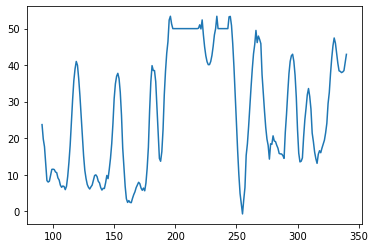

In [1]:
import pandas as pd
import numpy as np
from scipy.signal import savgol_filter
from numpy import *
import matplotlib.pyplot as plt
#read the data
df=pd.read_excel('Proband_1_CB1.xls')
#reset the columns numbers
columns = dict(map(reversed, enumerate(df.columns)))
df = df.rename(columns=columns)
#df=df[df!=0]
#select the columns which are related to knee, hip and ankle
df1=pd.concat([df.iloc[:,0],df.iloc[:,46:61]],axis=1)
#df1.replace(0,np.nan, inplace = True)
#df1.interpolate(inplace=True)
columns = dict(map(reversed, enumerate(df1.columns)))
df1 = df1.rename(columns=columns)
#missing values are replced by average values
data=df1.values
for i in range(len(data)-1):
    for j in range(len(data[0]-1)):
        if data[i][j]==0:
            data[i][j]= (data[i-1][j]+data[i+1][j])/2
df2=pd.DataFrame(data)
#rows with missing values are dropped
df2.replace(0,np.nan, inplace = True)
df2=df2.dropna()
w=df2
#calculate the numerator and denominator for
AngleNum = [((w.iloc[:,3] - w.iloc[:,8]) * (w.iloc[:,13] - w.iloc[:,8])) + ((w.iloc[:,4] - w.iloc[:,9]) * (w.iloc[:,14]-w.iloc[:,9])) + ((w.iloc[:,5] - w.iloc[:,10]) * (w.iloc[:,15] - w.iloc[:,10]))]
AngleDenom = [(sqrt(((w.iloc[:, 3] - w.iloc[:, 8]) ** 2) + ((w.iloc[:, 4] - w.iloc[:, 9]) ** 2) + ((w.iloc[:, 5] - w.iloc[:, 10]) ** 2))) * (sqrt(((w.iloc[:, 13] - w.iloc[:, 8]) ** 2) + ((w.iloc[:, 14] - w.iloc[:, 9]) ** 2) + ((w.iloc[:, 15] - w.iloc[:, 10]) ** 2)))]
a = np.divide(AngleNum, AngleDenom)
print(type(a))

b = 180 - degrees(np.arccos(a))
d = b[0]
for x in range(len(d)-1):
    if d[x]>50:
        d[x]=50
    if d[x]<0:
        d[x]=50
d=savgol_filter(d, 13, 2)
c = np.arange(1, len(d) + 1, 1)
plt.plot(c, d)
plt.show()



In [83]:
pd. set_option('display.max_rows', 500)